In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsOneClassifier

In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv"
df = pd.read_csv(file_path)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


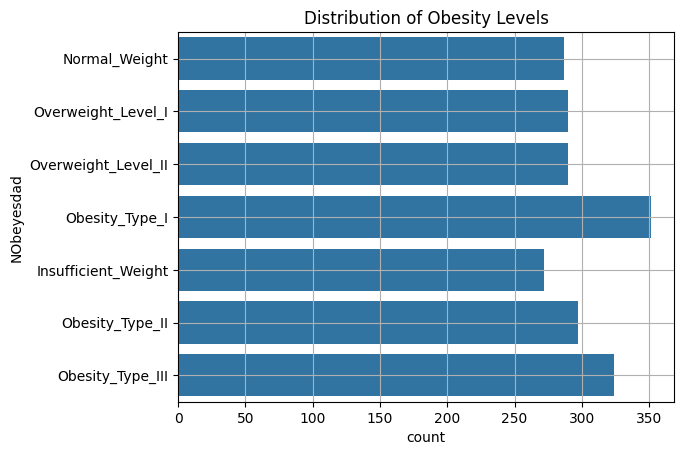

In [3]:
# Distribution of target variable
sns.countplot(y='NObeyesdad', data=df)
plt.title('Distribution of Obesity Levels')
plt.grid(True)
plt.show()

In [4]:
#df.isnull().sum()  #no null values detected

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
continuous_columns=df.select_dtypes(include=['float64']).columns.tolist()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[continuous_columns])

df_scaled=pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))
scaled_df=pd.concat([df.drop(columns = continuous_columns),df_scaled], axis=1 )


In [6]:

categorical_columns = scaled_df.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('NObeyesdad')  # Exclude target column


encoder = OneHotEncoder(sparse_output=False,drop='first')
encoded_features = encoder.fit_transform(scaled_df[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))
encoded_df


,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2107,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2108,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2109,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [7]:
prepped_df = pd.concat([encoded_df, scaled_df.drop(columns=categorical_columns)], axis=1)
prepped_df

,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,...,MTRANS_Walking,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Normal_Weight,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,Normal_Weight,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,Normal_Weight,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,Overweight_Level_I,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,Overweight_Level_II,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,Obesity_Type_III,-0.525774,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996
2107,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,Obesity_Type_III,-0.367195,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251
2108,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,Obesity_Type_III,-0.281909,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018
2109,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,Obesity_Type_III,0.007776,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991


In [8]:
prepped_df['NObeyesdad'].astype('category').cat.codes
prepped_df.head(5)

,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,...,MTRANS_Walking,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Normal_Weight,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,Normal_Weight,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,Normal_Weight,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,Overweight_Level_I,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,Overweight_Level_II,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625


In [9]:
X = prepped_df.drop('NObeyesdad', axis=1)
y=prepped_df['NObeyesdad']



In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
# OvA approach not preffered when class imbalance is huge
model_ova = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ova.fit(X_train, y_train)

c:\Users\Adarsh Yerneni\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr')

In [12]:
y_pred_ova = model_ova.predict(X_test)
pd.DataFrame(y_pred_ova, index=X_test.index)

,0
572,Insufficient_Weight
370,Insufficient_Weight
1002,Overweight_Level_I
1837,Obesity_Type_III
1724,Obesity_Type_II
...,...
1548,Obesity_Type_II
1161,Overweight_Level_II
1537,Obesity_Type_II
497,Insufficient_Weight


In [13]:
print('One vs all Strategy')
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ova))}")

One vs all Strategy
Accuracy: 76.0


In [14]:
y_test


572     Insufficient_Weight
370           Normal_Weight
1002    Overweight_Level_II
1837       Obesity_Type_III
1724        Obesity_Type_II
               ...         
1548        Obesity_Type_II
1161    Overweight_Level_II
1537        Obesity_Type_II
497           Normal_Weight
1396         Obesity_Type_I
Name: NObeyesdad, Length: 423, dtype: object

In [15]:
#ovo strat we need n(n-1)/2 binary classifiers, for n classes
ovo_model = OneVsOneClassifier(LogisticRegression(max_iter=1000)) 
ovo_model.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000))

In [16]:
y_pred_ovo = ovo_model.predict(X_test)
pd.DataFrame(y_pred_ovo, index = X_test.index)

,0
572,Insufficient_Weight
370,Insufficient_Weight
1002,Overweight_Level_II
1837,Obesity_Type_III
1724,Obesity_Type_II
...,...
1548,Obesity_Type_II
1161,Overweight_Level_II
1537,Obesity_Type_II
497,Insufficient_Weight


In [17]:
y_test

572     Insufficient_Weight
370           Normal_Weight
1002    Overweight_Level_II
1837       Obesity_Type_III
1724        Obesity_Type_II
               ...         
1548        Obesity_Type_II
1161    Overweight_Level_II
1537        Obesity_Type_II
497           Normal_Weight
1396         Obesity_Type_I
Name: NObeyesdad, Length: 423, dtype: object

In [18]:
np.round(100*accuracy_score(y_test, y_pred_ovo),4)

np.float64(92.1986)

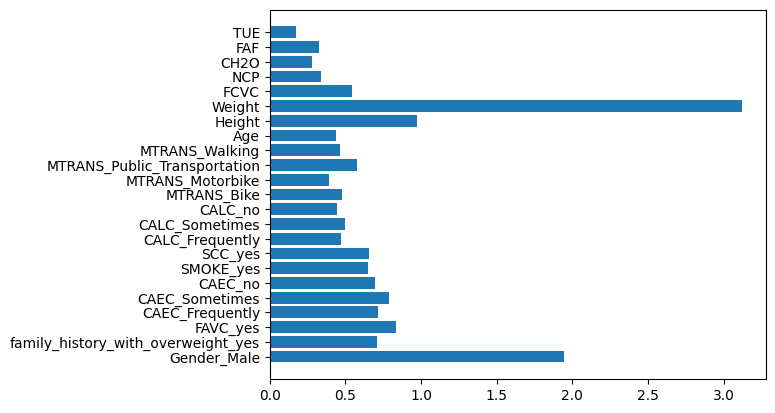

In [38]:
features_mean = np.mean(np.abs(np.round(model_ova.coef_, 3)),axis=0)
plt.barh(X.columns,features_mean)
#plt.xticks(rotation=45)
plt.show()


In [24]:
model_ova.coef_, model_ova.coef_.shape

(array([[-5.13388645e-01, -1.68411932e-01, -2.91422788e-01,
          1.19845514e+00,  7.14810701e-01,  3.48022195e-01,
         -7.47751970e-01, -2.69459556e-01, -4.18174717e-01,
          2.21184193e-01,  1.98027526e-01, -7.46571358e-01,
         -2.30398838e-01,  1.15351158e-01, -5.07643251e-01,
         -5.32857309e-01,  2.13242083e+00, -8.16366657e+00,
          3.22105759e-01,  1.06603962e-01,  2.07378505e-01,
         -8.27843283e-02,  1.31655111e-01],
        [ 9.40909158e-01, -1.93080610e-01, -9.53641704e-02,
         -1.05851846e+00, -1.68704478e+00, -1.48981893e+00,
          1.04049237e+00,  1.60822585e-01,  5.99543270e-01,
         -5.71662478e-01, -4.98339252e-01,  1.08992371e+00,
          1.06417514e+00, -3.04338622e-01,  1.42240239e+00,
         -1.97205885e-01, -6.81339397e-02, -1.56892303e+00,
         -1.66285548e-01, -4.75945995e-03, -2.57154384e-01,
          2.32062429e-01, -1.76495906e-01],
        [ 2.14902230e-01,  1.70169699e+00,  1.84243625e+00,
         -7.

In [37]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)